 ## 1. Importing necessary libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as sts
from statsmodels.stats.proportion import proportions_ztest
sns.set_color_codes=True
%matplotlib inline

 ## 2. Reading the data using dataframe

In [5]:
insurance_data = pd.read_csv('insurance (2).csv')

In [6]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 3.Perform basic EDA

### 3.a. Printing shape of the data

In [4]:
insurance_data.shape

(1338, 7)

### 3.b. Printing data type of each attribute(s)

In [5]:
insurance_data.dtypes.sort_index()

age           int64
bmi         float64
charges     float64
children      int64
region       object
sex          object
smoker       object
dtype: object

### 3.c. Checking the presence of missing values

In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3.d. 5 point summary of numerical attributes

#### Age

In [7]:
insurance_data['age'].describe()[['min','25%','50%','75%','max']]

min    18.0
25%    27.0
50%    39.0
75%    51.0
max    64.0
Name: age, dtype: float64

#### BMI

In [8]:
insurance_data['bmi'].describe()[['min','25%','50%','75%','max']]

min    15.96000
25%    26.29625
50%    30.40000
75%    34.69375
max    53.13000
Name: bmi, dtype: float64

#### Charges

In [9]:
insurance_data['charges'].describe()[['min','25%','50%','75%','max']]

min     1121.873900
25%     4740.287150
50%     9382.033000
75%    16639.912515
max    63770.428010
Name: charges, dtype: float64

#### Children    

In [10]:
insurance_data['children'].describe()[['min','25%','50%','75%','max']]

min    0.0
25%    0.0
50%    1.0
75%    2.0
max    5.0
Name: children, dtype: float64

### 3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

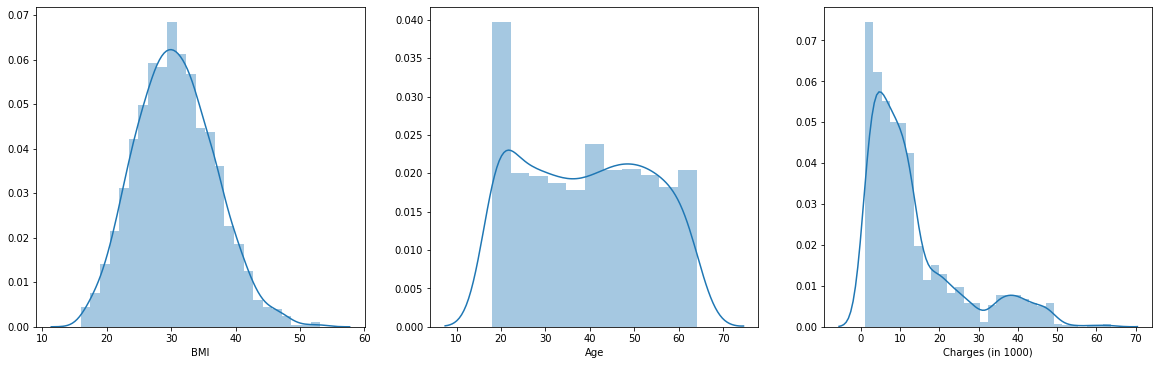

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.distplot(insurance_data['bmi'])
plt.xlabel('BMI')
plt.subplot(3,3,2)
sns.distplot(insurance_data['age'])
plt.xlabel('Age')
plt.subplot(3,3,3)
sns.distplot(insurance_data['charges']/1000)
plt.xlabel('Charges (in 1000)')
plt.show()

### 3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [12]:
print('Skewness of BMI is',insurance_data['bmi'].skew())
print('Skewness of Age is',insurance_data['age'].skew())
print('Skewness of Charges is',insurance_data['charges'].skew())

Skewness of BMI is 0.2840471105987448
Skewness of Age is 0.05567251565299186
Skewness of Charges is 1.5158796580240388


### 3.g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

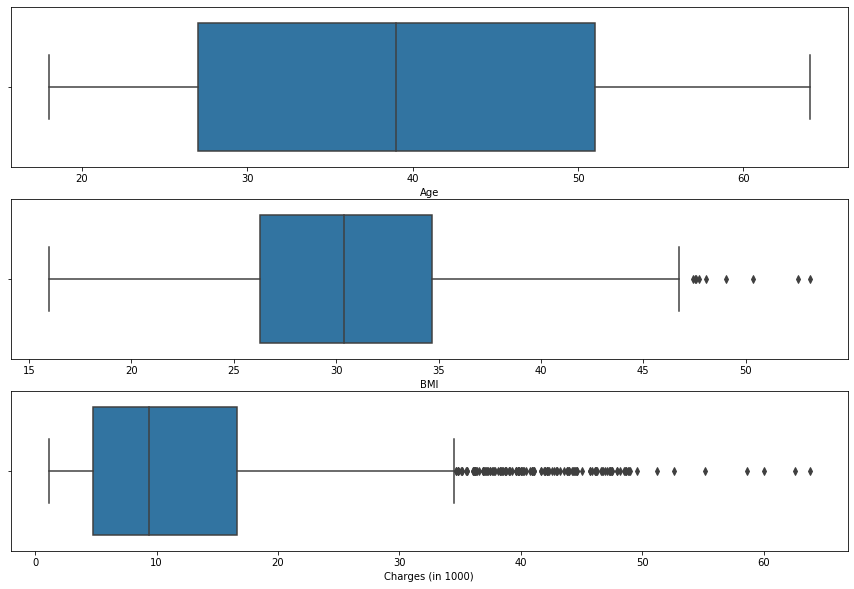

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.boxplot(insurance_data['age'])
plt.xlabel('Age')
plt.subplot(3,1,2)
sns.boxplot(insurance_data['bmi'])
plt.xlabel('BMI')
plt.subplot(3,1,3)
sns.boxplot(insurance_data['charges']/1000)
plt.xlabel('Charges (in 1000)')
plt.show()

#### From the above plots, we could summarize
* There are outliers in 'BMI' and 'Chargers'
* No outliers in 'Age'

### 3. h. Distribution of categorical columns (include children)
* Children, Region, Sex, Smoker

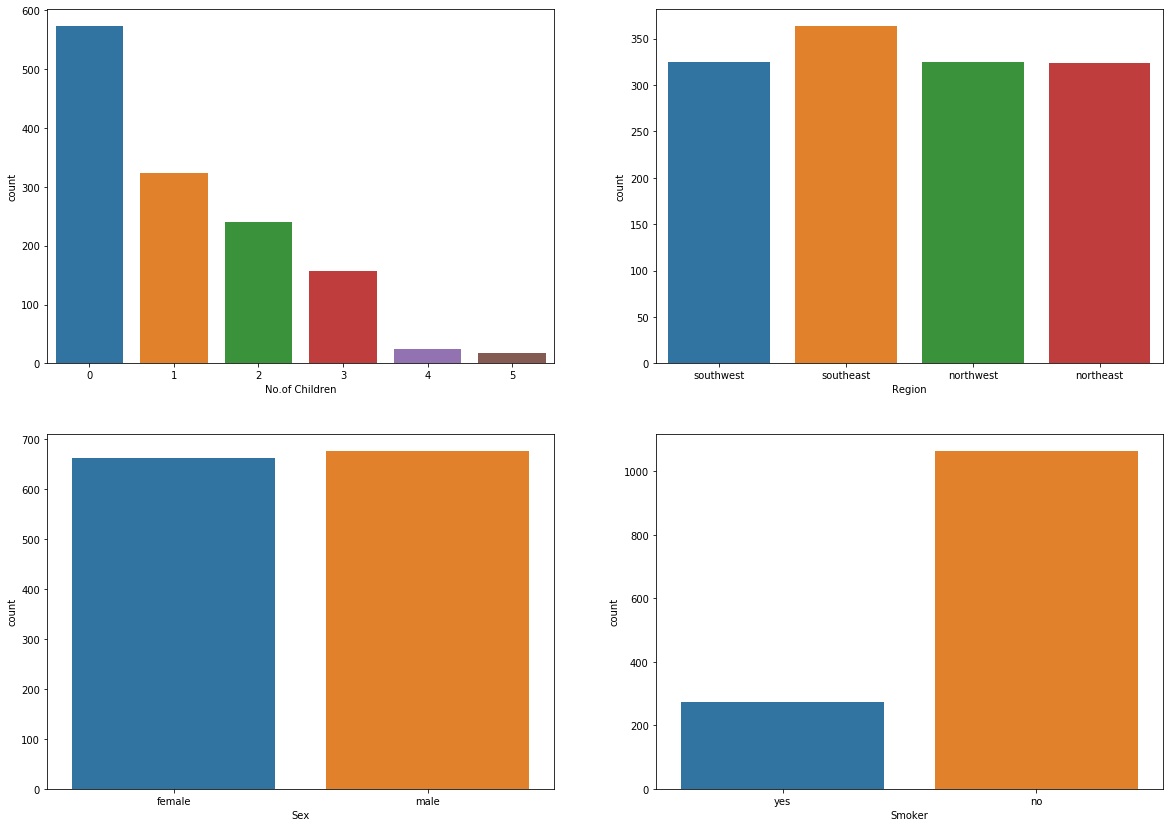

In [14]:
plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
sns.countplot(insurance_data['children'])
plt.xlabel('No.of Children')
plt.subplot(4,2,2)
sns.countplot(insurance_data['region'])
plt.xlabel('Region')
plt.subplot(4,2,3)
sns.countplot(insurance_data['sex'])
plt.xlabel('Sex')
plt.subplot(4,2,4)
sns.countplot(insurance_data['smoker'])
plt.xlabel('Smoker')
plt.show()

### 3. i. Pair plot that includes all the columns of the data frame

In [21]:
#sns.pairplot(insurance_data) #only numerical values are fetched

In [24]:
# Converting categorical variables to numerical variables to generate the plots
labelEncoder = preprocessing.LabelEncoder()

In [25]:
labeled_insurance_data = insurance_data.copy() # for avoiding cloning issue
labeled_insurance_data.loc[:]= labeled_insurance_data.loc[:].apply(labelEncoder.fit_transform)

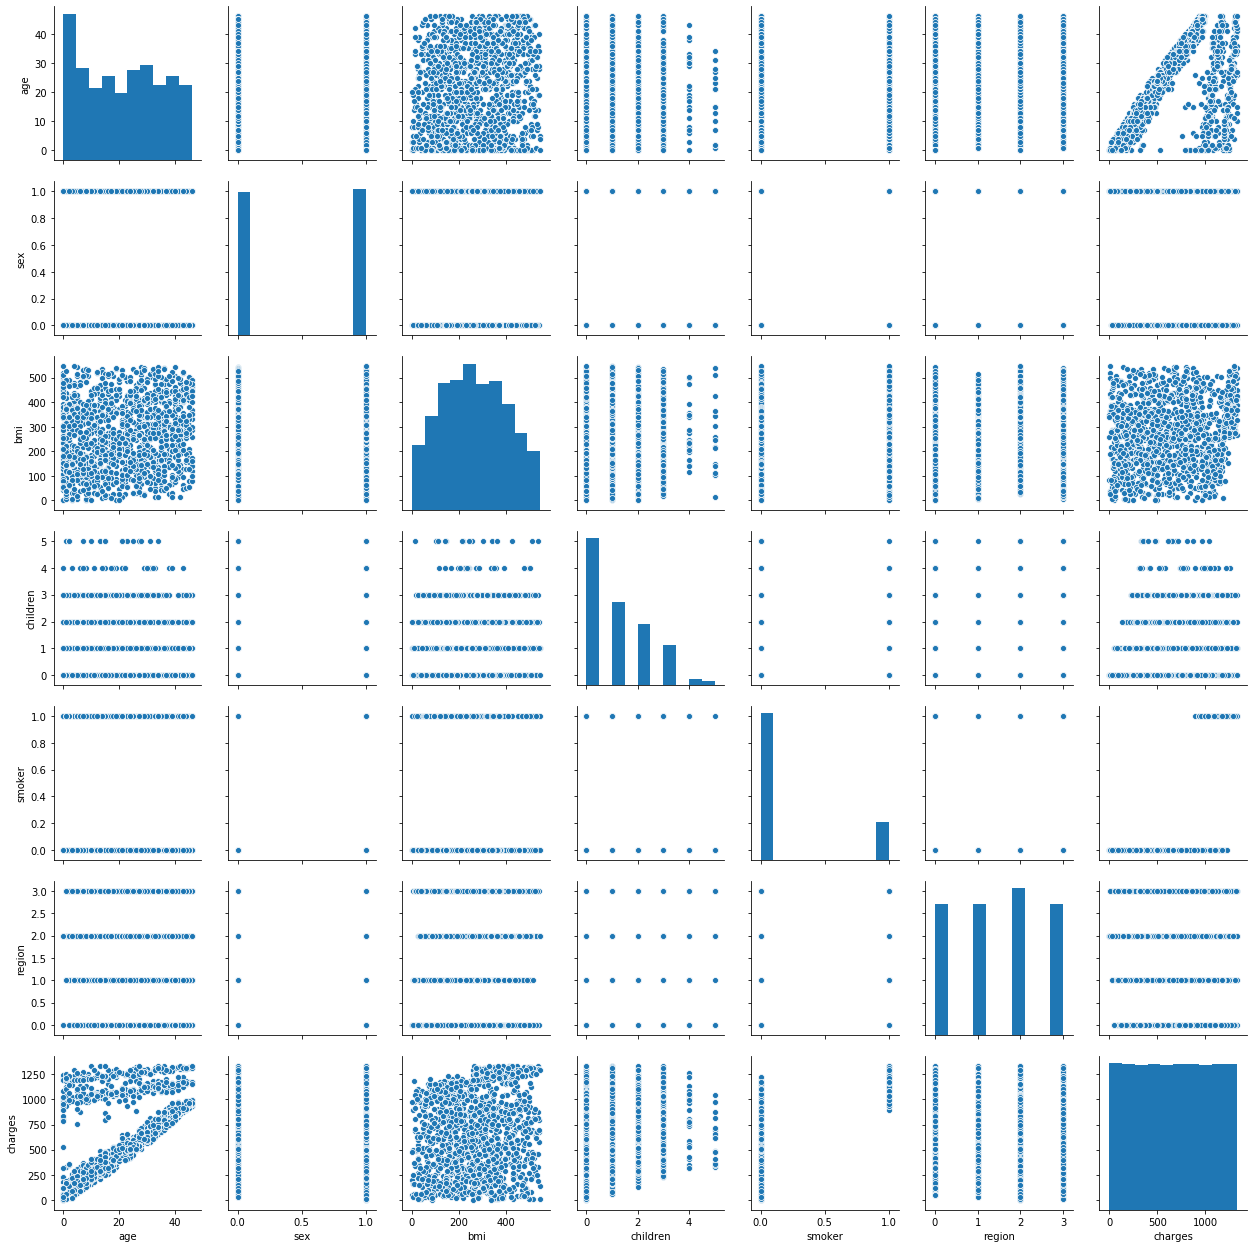

In [26]:
sns.pairplot(labeled_insurance_data)

## 4. Statistical Evidence

### 4.a. Do charges of people who smoke differ significantly from the people who don't?

In [73]:
#Step 1: Defining Null and Alternative Hypothesis
Ho = 'No significant difference for charges between the categories (Smokers and Non-Smokers)'
Ha = 'There is significant difference for charges between the categories (Smokers and Non-Smokers) '

#Step 2: Defining the level of Significance (α)

level_of_sgf= 0.05

#Step 3: Calculating t-statistic and corresponding p_val

smoker_charges= insurance_data[insurance_data['smoker']=='yes']['charges']
non_smoker_charges = insurance_data[insurance_data['smoker']=='no']['charges']
t_stat, p_val = sts.ttest_ind(smoker_charges,non_smoker_charges)

#Step 4: Conclusion on derived t_stat and p_val

if (p_val<level_of_sgf):
    print('With α = 0.05, p_val=',p_val,'(<',level_of_sgf,')')
    print(Ha)
else:
    print('With α = 0.05, p_val=',p_val,'(>',level_of_sgf,')')
    print(Ho)

With α = 0.05, p_val= 8.271435842177219e-283 (< 0.05 )
There is significant difference for charges between the categories (Smokers and Non-Smokers) 


### 4.b. Does bmi of males differ significantly from that of females

In [74]:
#Step 1: Defining Null and Alternative Hypothesis
Ho = 'BMI for Male and Female are same'
Ha = 'BMI for Male and Female are not same'

#Step 2: Defining the level of Significance (α)

level_of_sgf= 0.05

#Step 3: Calculating t-statistic and corresponding p_val

male_bmi= insurance_data[insurance_data['sex']=='male']['bmi']
female_bmi = insurance_data[insurance_data['sex']=='female']['bmi']
t_stat, p_val = sts.ttest_ind(male_bmi,female_bmi)

#Step 4: Conclusion on derived t_stat and p_val

if (p_val<level_of_sgf):
    print('With α = 0.05, p_val=',p_val,'(<',level_of_sgf,')')
    print(Ha)
else:
    print('With α = 0.05, p_val=',p_val,'(>',level_of_sgf,')')
    print(Ho)

With α = 0.05, p_val= 0.08997637178984932 (> 0.05 )
BMI for Male and Female are same


### 4.c. Is the proportion of smokers significantly different in different genders

In [75]:
#Step 1: Defining Null and Alternative Hypothesis
Ho = 'Proportion are equal irrespective of genders'
Ha = 'Proportion varies based on the gender'

#Step 2: Defining the level of Significance (α)

level_of_sgf= 0.05

#Step 3: Calculating z-statistic  and corresponding p_val
insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()

smokers_male = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()[1]  
smokers_female = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts()[1]

total_data =insurance_data['sex'].value_counts()
total_males = total_data[0] 
total_females = total_data[1] 

z_stat, p_val= proportions_ztest([smokers_male,smokers_female],[total_males,total_females])

#Step 4: Conclusion on derived z_stat and p_val

if (p_val<level_of_sgf):
    print('With α = 0.05, p_val=',p_val,'(<',level_of_sgf,')')
    print(Ha)
else:
    print('With α = 0.05, p_val=',p_val,'(>',level_of_sgf,')')
    print(Ho)

With α = 0.05, p_val= 0.005324114164320532 (< 0.05 )
Proportion varies based on the gender


### 4.d. Is the distribution of bmi across women with no children, one child and two children, the same

In [76]:
#Step 1: Defining Null and Alternative Hypothesis
Ho = 'BMI not affected by no.of children'
Ha = 'BMI is affected by no.of children'

#Step 2: Defining the level of Significance (α)

level_of_sgf= 0.05

#Step 3: Calculating 1way ANOVA across the level 'children -0/1/2' for BMI and corresponding p_val

level_0 = insurance_data[(insurance_data['sex'] == 'female') & (insurance_data['children'] ==0)]['bmi']
level_1 = insurance_data[(insurance_data['sex'] == 'female') & (insurance_data['children'] ==1)]['bmi']
level_2 = insurance_data[(insurance_data['sex'] == 'female') & (insurance_data['children'] ==2)]['bmi']
anova_stat,p_val = sts.f_oneway(level_0,level_1,level_2)

#Step 4: Conclusion on derived t_stat and p_val

if (p_val<level_of_sgf):
    print('With α = 0.05, p_val=',p_val,'(<',level_of_sgf,')')
    print(Ha)
else:
    print('With α = 0.05, p_val=',p_val,'(>',level_of_sgf,')')
    print(Ho)

With α = 0.05, p_val= 0.7158579926754841 (> 0.05 )
BMI not affected by no.of children
